In [1]:
# -*- coding: utf-8 -*-
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import time
import nltk.stem
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

ru_stemmer = nltk.stem.SnowballStemmer('russian')
import matplotlib.pyplot as plt
from matplotlib import rc
font = {'family': 'Verdana',
        'weight': 'normal'}
rc('font', **font)
import itertools
from sklearn import metrics#, cross_validation


from sklearn.cross_validation import train_test_split


from datetime import datetime, date, time
from dateutil.parser import parse
import sklearn as sk
import sys
from sklearn import metrics
import re

from sklearn import preprocessing
from IPython.display import display, HTML
from sklearn.metrics import confusion_matrix



In [2]:
stop_words = ['и', 'в', 'во', 'не']
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([ru_stemmer.stem(w) for w in analyzer(doc)])
vectorizerContent = StemmedCountVectorizer (min_df=1, stop_words=stop_words, lowercase=True, analyzer="word")


In [3]:
data_start=pd.read_pickle('data/WikiData_dat_5.pkl')
#print (data_start.head(1))
topic=[]
for row in data_start['cat'].tolist():
    if "спорт" in row:
        topic.append(1)
    else:
        topic.append(-1)
print (len(topic))
data_start['topic']=topic
data_bi=data_start[['title', 'cat', 'text2', 'noun', 'topic']][:3000]
data_test=data_start[['title', 'cat', 'text2', 'noun', 'topic']][3000:4000]
d_sport = (data_bi['topic']==1)
#d_other=(data_bi['topic']==u'other')
#data2=pd.concat([data_bi.loc[d_sport], data_bi.loc[d_other]])
data=data_bi.loc[d_sport]
print (len(data), len(data_test))
print ('Test \n', data_test['topic'].value_counts(), '\nALL \n',  data_start['topic'].value_counts(), '\nLearning\n', data['topic'].value_counts())



10748
117 1000
Test 
 -1    969
 1     31
Name: topic, dtype: int64 
ALL 
 -1    10549
 1      199
Name: topic, dtype: int64 
Learning
 1    117
Name: topic, dtype: int64


In [4]:
category = data['topic'].tolist()
corpus = data['title'].tolist()
vectorizer_model = vectorizerContent.fit(corpus)
vectors = vectorizerContent.transform(corpus)


In [5]:
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.3)
clf.fit(vectors)


OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.3, kernel='rbf',
      max_iter=-1, nu=0.1, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [6]:
y_train, y_test = data.topic, data_test.topic
X_test = vectorizerContent.transform(data_test.title)
pred = clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)


accuracy:   0.067
confusion matrix:
[[ 44 925]
 [  8  23]]


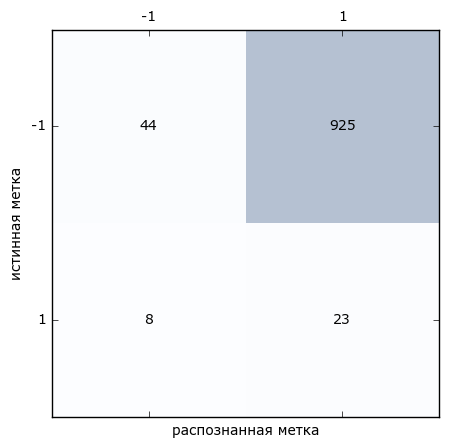

In [8]:
print("accuracy:   %0.3f" % score)
print("confusion matrix:")
print(metrics.confusion_matrix(y_test, pred))
labels=['-1', '1']
confmat=metrics.confusion_matrix(y_test, pred)
fig, ax = plt.subplots(figsize=(5,5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
               s=confmat[i,j],
               va='center', ha='center')
plt.xticks(np.arange(0,2), labels)
plt.yticks(np.arange(0,2), labels)
plt.xlabel('распознанная метка')
plt.ylabel('истинная метка')
plt.savefig('data/SVM.png')
plt.show()
